In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds

In [23]:
plt.rc('font', size=12)

In [24]:
# 0.1M Records
MP509 = get_results("MP509")
MP510 = get_results("MP510")
MP511 = get_results("MP511")

# 0.2M Records
MP512 = get_results("MP512")
MP513 = get_results("MP513")
MP514 = get_results("MP514")

# 0.5M Records
MP515 = get_results("MP515")
MP516 = get_results("MP516")
MP517 = get_results("MP517")

# 1M Records
MP518 = get_results("MP518")
MP519 = get_results("MP519")
MP520 = get_results("MP520")

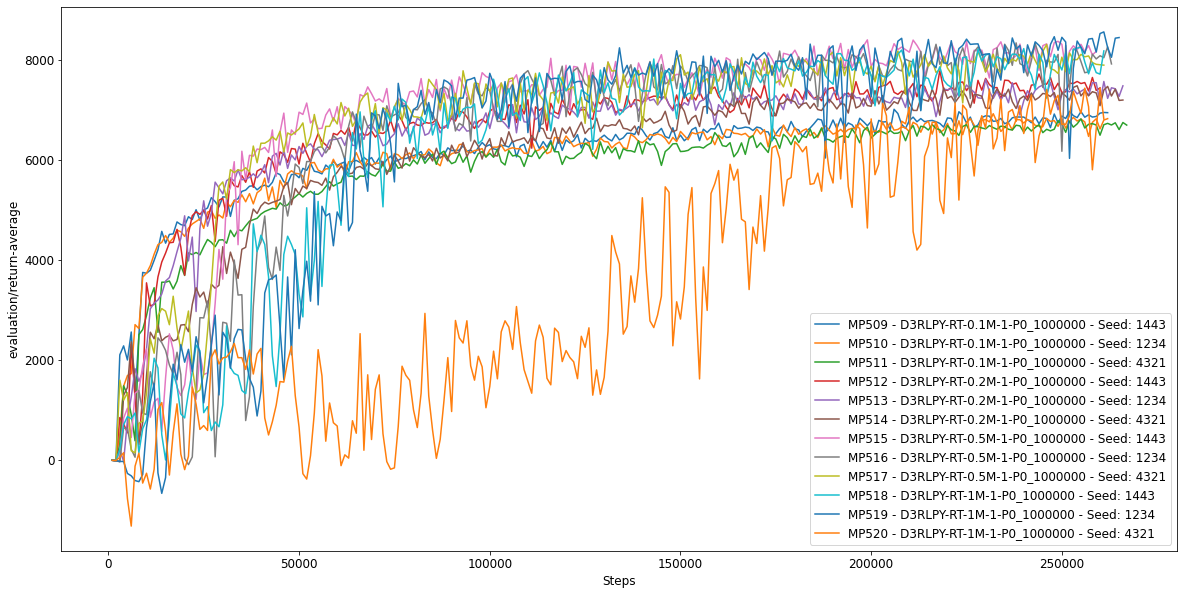

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP509,
    MP510,
    MP511,
    MP512,
    MP513,
    MP514,
    MP515,
    MP516,
    MP517,
    MP518,
    MP519,
    MP520,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass